# Optimal Speed and Optimal Hedging

First I propose to solve a deterministic problem with the same parameters. I will help up to:
(1) Compare the results from deterministic to scochatic settings
(2) Set the grid and boundaries for parameters in the stochastic setting
(3) Provide starting points for the optimization

### Running Deterministic Optimization

In [214]:
import pandas as pd
from scipy.interpolate import interp1d
from Logistics_stoch import CShip
from Logistics_stoch import CRoundtrip
from Logistics_stoch import CJourney
from Logistics_stoch import CPort
import deterministic_opt_func as det_opt

oJourney = CJourney(NrOfRoundtrips = 1,
                    LegsPerRoundtrip = 5,
                    OpprtCostCapitalRate = 0.08,
                    DailyHire_USDperDay = 30000,
                    FutureProfitPotential_USDperDay = 12968)


oShip = CShip(Vmin=10, 
              Vmax=17, 
              DWTscantling=157880, 
              DWTdesign=145900, 
              Lightweight=49000, 
              k=0.00000391, 
              p=381, 
              g=3.1, 
              a=0.666667, 
              ShipDischargeRate=3000, 
              BallastCapacity=54500,
              MinFillRateShip=0.3,
              AuxFuelConsumption_TonnePerDay=5)

oPortList = []

df_data = pd.read_excel('journey_data.xlsx',sheet_name='Ports')

for i in range(0,oJourney.LegsPerRoundtrip+1):
    for index,row in df_data.iterrows():
        v_name = row['Variable']
        v_value = row[i]
        #print("Loading from excel, leg:"+str(i)+", Executing statement("+str(v_name)+"="+str(v_value)+")")
        exec(v_name + '=' + str(v_value))
    
    
    print(CargoRevenueRate_USDperBarrelper1000nm)
    oPort = CPort(PortNr=i, 
                  DistancePreviousPort_nm=DistancePreviousPort_nm,
                  LoadingRate_QbmetresperHr=LoadingRate_QbmetresperHr,
                  WaitingTime_Hrs=WaitingTime_Hrs,              
                  CargoIntake_Barrels=CargoIntake_Barrels,
                  CargoIntake_QBmetresperBarrel=CargoIntake_QBmetresperBarrel,
                  CargoIntake_QbmetresPerTonne=CargoIntake_QbmetresPerTonne,
                  FixedPortAccessCosts_USD = FixedPortAccessCosts_USD,
                  UnloadingCharge_USDperHr = UnloadingCharge_USDperHr,
                  LoadingCharge_USDperHr = LoadingCharge_USDperHr,
                  CargoRevenueRate_USDperBarrelper1000nm = CargoRevenueRate_USDperBarrelper1000nm,
                  MainBunkerRate_USDperBarrel = MainBunkerRate_USDperBarrel,
                  MainBunker_QBmetresperBarrel = MainBunker_QBmetresperBarrel,
                  MainBunker_QbmetresPerTonne = MainBunker_QbmetresPerTonne,
                  AuxFuelRate_USDperTonne = AuxFuelRate_USDperTonne,
                  UnloadingCosts_USD = UnloadingCosts_USD,
                  LoadingCosts_USD = LoadingCosts_USD,
                  CargoIntake_Tonne = CargoIntake_Tonne,
                  UnloadingTime_Hrs = UnloadingTime_Hrs,
                  LoadingTime_Hrs = LoadingTime_Hrs,
                  LegRevenue_Barrels = LegRevenue_Barrels,
                  LegRevenue_USD = LegRevenue_USD)
    
    oPortList.append(oPort)

oRTList_det = det_opt.run_deterministic_opt(oJ=oJourney,
                                            oS=oShip,
                                            oPL=oPortList)
# storing solution in the journey object
oJourney.oRTList_det = oRTList_det


0.5
0.45
0.45
0.45
0.45
0.45
********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1000000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:59166500.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:846743.2257190181
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:60922236.42273887
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:853233.9234722476
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:62666150.727873124
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundT

In [215]:
df_data

Parameter     Units        Section  \
0          Distance from previous port        nm            Leg   
1                  Cargo loading rate   m^3/hour            Leg   
2   Waiting time (queueing + berthing)       hrs            Leg   
3               Cargo intake (barrels)   barrels        Demand    
4                           m^3/barrel       NaN        Demand    
5                  Density (m^3/tonne)       NaN        Demand    
6               Per barrel per 1000 nm       USD        Revenue   
7              Fixed Port Access Costs       USD  Harbour Costs   
8             Unloading charge (/hour)       USD  Harbour Costs   
9               Loading charge (/hour)       USD  Harbour Costs   
10               Main bunker (/barrel)       USD          Fuel    
11            Main bunker m^3 / barrel       NaN          Fuel    
12    Main bunker Density (M^3./tonne)       NaN          Fuel    
13             Auxiliary fuel (/tonne)       USD          Fuel    
14                     Unloading costs       USD           Cost   
15                       Loading costs       USD           Cost   
16                Cargo intake (tonne)     tonne           Cost   
17                      Unloading time       hrs           Cost   
18                        Loading time       hrs           Cost   
19                 Leg revenues (/leg)   Barrels        Revenue   
20                 Leg revenues (/leg)   Barrels            USD   

                                  Variable               0             1  \
0                  DistancePreviousPort_nm        0.000000  8.293000e+03   
1                LoadingRate_QbmetresperHr     3000.000000  3.000000e+03   
2                          WaitingTime_Hrs       24.000000  2.400000e+01   
3                      CargoIntake_Barrels  1000000.000000  1.200000e+06   
4            CargoIntake_QBmetresperBarrel        0.136000  1.360000e-01   
5             CargoIntake_QbmetresPerTonne        1.070000  1.070000e+00   
6   CargoRevenueRate_USDperBarrelper1000nm        0.500000  4.500000e-01   
7                 FixedPortAccessCosts_USD   300000.000000  3.000000e+05   
8                 UnloadingCharge_USDperHr        0.000000  4.000000e+03   
9                   LoadingCharge_USDperHr     4000.000000  4.000000e+03   
10             MainBunkerRate_USDperBarrel       63.000000  6.300000e+01   
11            MainBunker_QBmetresperBarrel        0.136000  1.360000e-01   
12             MainBunker_QbmetresPerTonne        1.070000  1.070000e+00   
13                 AuxFuelRate_USDperTonne      590.000000  5.900000e+02   
14                      UnloadingCosts_USD        0.000000  1.813333e+05   
15                        LoadingCosts_USD   181333.333333  2.176000e+05   
16                       CargoIntake_Tonne   127102.803738  1.525234e+05   
17                       UnloadingTime_Hrs        0.000000  4.533333e+01   
18                         LoadingTime_Hrs       45.333333  5.440000e+01   
19                      LegRevenue_Barrels        0.000000  2.487900e+04   
20                          LegRevenue_USD        0.000000  1.243950e+04   

               2             3             4             5             6   7  \
0   8.293000e+03  8.293000e+03  8.293000e+03  8.293000e+03  8.293000e+03 NaN   
1   3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03 NaN   
2   2.400000e+01  2.400000e+01  2.400000e+01  2.400000e+01  2.400000e+01 NaN   
3   1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06 NaN   
4   1.360000e-01  1.360000e-01  1.360000e-01  1.360000e-01  1.360000e-01 NaN   
5   1.070000e+00  1.070000e+00  1.070000e+00  1.070000e+00  1.070000e+00 NaN   
6   4.500000e-01  4.500000e-01  4.500000e-01  4.500000e-01  4.500000e-01 NaN   
7   3.000000e+05  3.000000e+05  3.000000e+05  3.000000e+05  3.000000e+05 NaN   
8   4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03 NaN   
9   4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03  4.000000e+03 NaN   
1

# Set up the freight rate dynamics
We assume that the log of the spot freight rate has the Ornstein-Uhlenbeck (OU) dynamics:

$dR_t = \lambda_r (R_t - \bar{R}) dt + \sigma_r dW_t$

The solution of the OU process is well know, the random variable is normally distributed with the following mean and variance:

$\mathbb{E}(R_T|R_0) = R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T})$

$Var(R_T|R_0) = \frac{{\sigma_r}^2}{2 \lambda_r}(1 - e^{-2\lambda_r T})$

To get to the actual freight rate:

$\mathbb{E} [exp(R_T)|R_0] = e^{\mathbb{E}(R_T|R_0) + 0.5*Var(R_T|R_0)} = e^{R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T}) + \frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}$

$Var[exp(R_T)|R_0] = (e^{Var(R_T|R_0)}-1) e^{2\mathbb{E}(R_T|R_0) + Var(R_T|R_0)} = (e^{\frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}-1) e^{2(R_0 e^{-\lambda_r T} + \bar{R} (1 - e^{-\lambda_r T})) + \frac{{\sigma_r}^2}{4 \lambda_r}(1 - e^{-2\lambda_r T})}$


In [216]:
# O.U. parameters of the log rate model:
# the data is assuming T=1 it is one year.

import matplotlib.pyplot as plt
import OU_process

ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


T_days=15
r = 6.27
states, step = ou_process.gen_states(T_days=T_days)
print('All generated states for T_days=' + str(T_days))
print(states)
p = ou_process.p_vector(states, step, r, T_days=T_days)

plt.xlabel('States')
plt.title('Probability as a function of state in T_days')
plt.plot(states, p)
plt.show()

All generated states for T_days=15
[6.01755091 6.02373562 6.02992034 6.03610505 6.04228977 6.04847448
 6.0546592  6.06084391 6.06702863 6.07321334 6.07939806 6.08558277
 6.09176749 6.0979522  6.10413692 6.11032163 6.11650635 6.12269106
 6.12887578 6.13506049 6.14124521 6.14742992 6.15361464 6.15979935
 6.16598407 6.17216878 6.1783535  6.18453821 6.19072293 6.19690764
 6.20309236 6.20927707 6.21546179 6.2216465  6.22783122 6.23401593
 6.24020065 6.24638536 6.25257008 6.25875479 6.26493951 6.27112422
 6.27730894 6.28349365 6.28967837 6.29586308 6.3020478  6.30823251
 6.31441723 6.32060194 6.32678666 6.33297137 6.33915609 6.3453408
 6.35152552 6.35771023 6.36389495 6.37007966 6.37626438 6.38244909]


## Forward Freight Agreements

We assume that the futures curve is trading at a certain discount to the expected spot rate given by the O.U. process. If the spot rate is below its long term average, the expectation curve will look like a contango, and for a spot rate above the long term rate, the expectation curve will look like a backwardation. On both of these curves we apply a discount which is governed by a slope contant (fut_curve_slope in the code):

$F_T = e^{-slope * T} \mathbb{E}(e^{R_T}|R_t)$

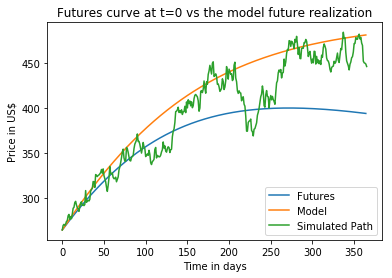

In [217]:
import numpy as np
import FFA
ffa = FFA.FFA(fut_curve_slope = -0.2)

r0 = ou_process.r_bar * 0.9
T_hor = np.array(range(0,365))
futures_curve = []
expecation_curve= []
for t in T_hor:
    E_R = ou_process.E_exp(r0=r0,T_days=t)
    futures_curve.append(ffa.shipping_futures(E_R=E_R,T_days=t))
    expecation_curve.append(E_R)
    
plt.plot(futures_curve,label='Futures')
plt.plot(expecation_curve, label='Model')
plt.plot(np.exp(ou_process.generate_path(r=r0,T_days=365)), label='Simulated Path')
plt.xlabel("Time in days")
plt.ylabel("Price in US$")
plt.title("Futures curve at t=0 vs the model future realization")
if r0<ou_process.r_bar:
    plt.legend(loc="lower right")
else:
    plt.legend(loc="upper right")
plt.show()

## Running the stochastic optimization

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


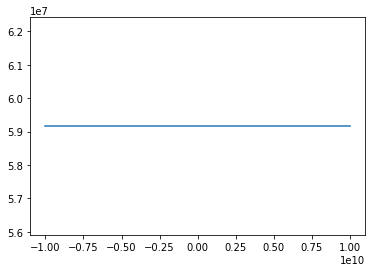

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f566245e9a8>
Running optimization for state: 4.4564678875979356
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.515570671069192
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.574673454540449
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.633776238011705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.692879021482962
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.751981804954218
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.811084588425474
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.870187371896731
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e

2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.4116070611607565
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.4707098446320135
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.5298126281032705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.588915411574526
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.648018195045783
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.70712097851704
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.766223761988296
2e-08
2e-08
2e-08
2e-08


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56623738b8>
Running optimization for state: 4.4564678875979356
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.515570671069192
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.574673454540449
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.633776238011705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.692879021482962
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.751981804954218
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.811084588425474
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.870187371896731
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e

2e-08
2e-08
2e-08
Running optimization for state: 7.588915411574526
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.648018195045783
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.70712097851704
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.766223761988296
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.825326545459552
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.884429328930809
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.943532112402065
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
RoundtripNr:1
LegNr:3


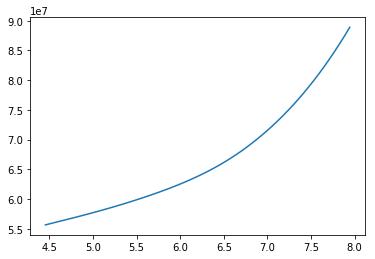

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563bedb368>
Running optimization for state: 4.4564678875979356
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.515570671069192
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.574673454540449
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.633776238011705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.692879021482962
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.751981804954218
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for

2e-08
2e-08
Running optimization for state: 7.4116070611607565
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.4707098446320135
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.5298126281032705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.588915411574526
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.648018195045783
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.70712097851704
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.766223761988296
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.825326545459552
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-0

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563e1be3b8>
Running optimization for state: 4.4564678875979356
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.515570671069192
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.574673454540449
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.633776238011705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.692879021482962
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.751981804954218
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08


2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
RoundtripNr:1
LegNr:1


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56901d3d18>
Running optimization for state: 4.4564678875979356
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.515570671069192
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.574673454540449
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.633776238011705
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.692879021482962
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 4.751981804954218
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Runnin

2e-08
Running optimization for state: 7.766223761988296
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.825326545459552
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.884429328930809
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
Running optimization for state: 7.943532112402065
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
2e-08
0


In [218]:
from Optimization_Problem import Optimization_Problem
op0 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.9), 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=2e-08) # determines how important is the variance of future spot rates)
oRTList0 = op0.run_optimization()

# Display the results



## Value Function ($G$) or Goodwill 

The final value function after all legs and rountrip were calculated from the back.

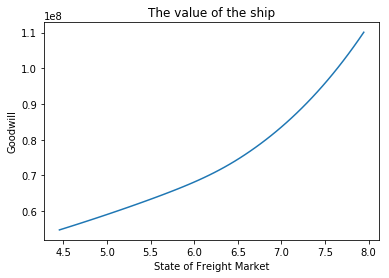

In [219]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

plt.plot(oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.x,
         oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.y)
plt.xlabel('State of Freight Market') 
plt.ylabel('Goodwill') 
plt.title('The value of the ship')
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()



## Hedge Ratio

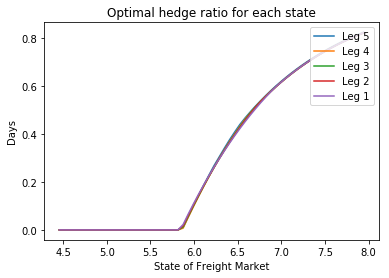

In [220]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[1].Hedge_Ratio.x,
         oRTList0[1].oLegList[1].Hedge_Ratio.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].Hedge_Ratio.x,
         oRTList0[1].oLegList[2].Hedge_Ratio.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[3].Hedge_Ratio.x,
         oRTList0[1].oLegList[3].Hedge_Ratio.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Optimal hedge ratio for each state')
plt.show()

## Time of trip

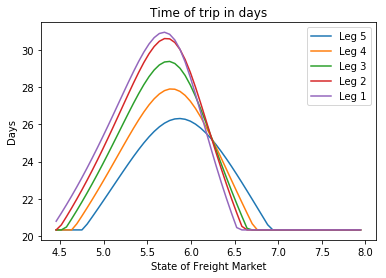

In [221]:
plt.plot(oRTList0[1].oLegList[4].TimeAtSea_Days.x,
         oRTList0[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[3].TimeAtSea_Days.x,
         oRTList0[1].oLegList[3].TimeAtSea_Days.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].TimeAtSea_Days.x,
         oRTList0[1].oLegList[2].TimeAtSea_Days.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[1].TimeAtSea_Days.x,
         oRTList0[1].oLegList[1].TimeAtSea_Days.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()





## Speed trip

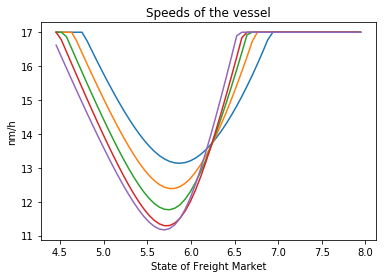

In [222]:
plt.plot(oRTList0[1].oLegList[4].Speed_kn.x,
         oRTList0[1].oLegList[4].Speed_kn.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[3].Speed_kn.x,
         oRTList0[1].oLegList[3].Speed_kn.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].Speed_kn.x,
         oRTList0[1].oLegList[2].Speed_kn.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[1].Speed_kn.x,
         oRTList0[1].oLegList[1].Speed_kn.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[0].Speed_kn.x,
         oRTList0[1].oLegList[0].Speed_kn.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.show()


## Changing parameters of the problem:

Assume that the forward rates are discounted by more than previously assumed, in this case hadging is more costly on average, we expect less hedging and decrease of the hedge ratio:

> ffa = FFA.FFA(fut_curve_slope = -0.01)

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


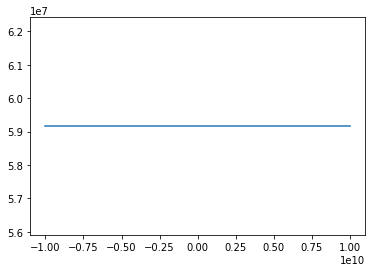

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f566226d2c8>
Running optimization for state: 5.618822629199312
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.638523557023064
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.658224484846817
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.677925412670568
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.69762634049432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.717327268318073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.737028196141825
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.756729123965577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.776430051789329
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.796130979613081
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


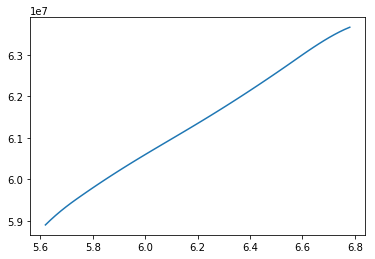

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f5690233868>
Running optimization for state: 5.618822629199312
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.638523557023064
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.658224484846817
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.677925412670568
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.69762634049432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.717327268318073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.737028196141825
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.756729123965577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.776430051789329
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.796130979613081


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56624ae4f8>
Running optimization for state: 5.618822629199312
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.638523557023064
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.658224484846817
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.677925412670568
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.69762634049432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.717327268318073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.737028196141825
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.756729123965577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56624e6a48>
Running optimization for state: 5.618822629199312
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.638523557023064
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.658224484846817
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.677925412670568
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.69762634049432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.717327268318073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.737028196141825
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.756729123965577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.776430051789329
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

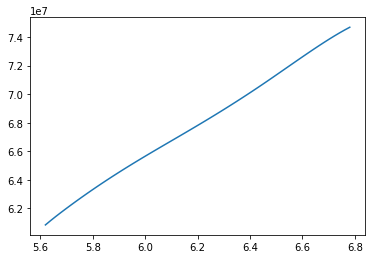

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56622495e8>
Running optimization for state: 5.618822629199312
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.638523557023064
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.658224484846817
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.677925412670568
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.69762634049432
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.717327268318073
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.737028196141825
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running optimization for state: 5.756729123965577
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Running 

In [223]:
from Optimization_Problem import Optimization_Problem
op1 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, 
                                                        r_lambda=3, 
                                                        r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.000000) 
oRTList1 = op1.run_optimization()

## Comparison of hedge ratios

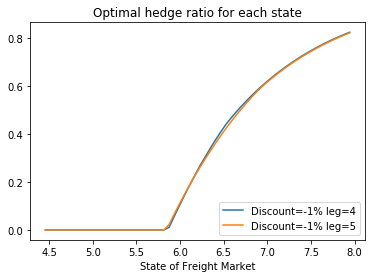

In [224]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Discount=-1% leg=4')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% leg=5')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

## Comparison of time of journeys of the last leg

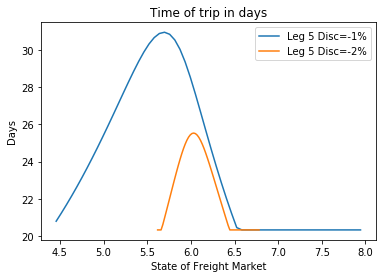

In [225]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1%')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2%')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## More importance to the volatility of the spot rates 
>eta=0.000001

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


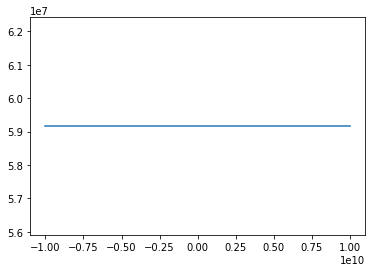

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56623bd188>
Running optimization for state: 5.618822629199312
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.638523557023064
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.658224484846817
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.677925412670568
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.69762634049432
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.717327268318073
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.3871588143256455
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.406859742149398
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.42656066997315
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.4462615977969016
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06

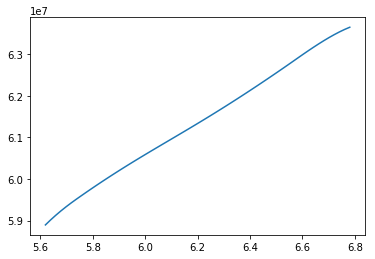

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f566238e048>
Running optimization for state: 5.618822629199312
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.638523557023064
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.658224484846817
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.677925412670568
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.69762634049432
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.717327268318073
1.5e

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.485663453444406
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.5053643812681585
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.525065309091911
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.544766236915663
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state:

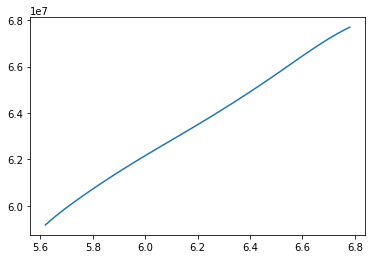

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f5690114d68>
Running optimization for state: 5.618822629199312
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.638523557023064
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.658224484846817
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.677925412670568
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.69762634049432
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-0

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.288654175206885
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.308355103030637
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.328056030854389
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.347756958678142
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06


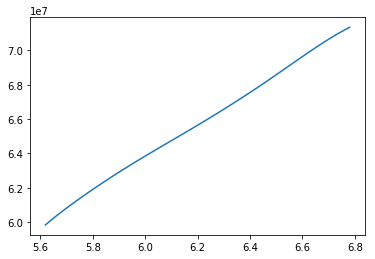

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f566251f728>
Running optimization for state: 5.618822629199312
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.638523557023064
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.658224484846817
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.677925412670568
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.69762634049432
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.209850463911876
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.229551391735629
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.24925231955938
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.268953247383132
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563e20c908>
Running optimization for state: 5.618822629199312
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.638523557023064
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.658224484846817
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.677925412670568
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.69762634049432
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-0

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.268953247383132
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.288654175206885
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.308355103030637
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.328056030854389
1.5e-06


In [226]:
op2 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.0000015) 
oRTList2 = op2.run_optimization()

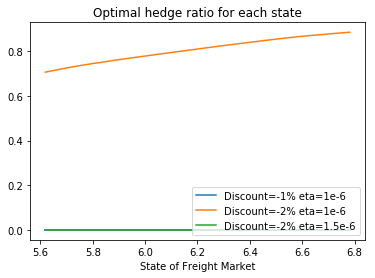

In [227]:
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=1e-6')
plt.plot(oRTList2[1].oLegList[4].Hedge_Ratio.x,
         oRTList2[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1e-6')
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

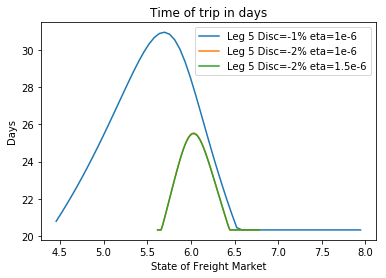

In [228]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1% eta=1e-6')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1e-6')
plt.plot(oRTList2[1].oLegList[0].TimeAtSea_Days.x,
         oRTList2[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## Changing paramters of the OU process

> ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


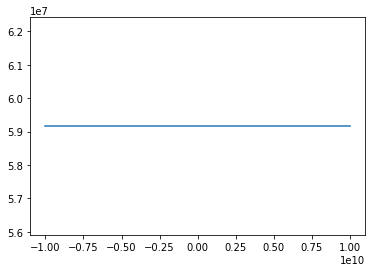

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56901abea8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.4462615977969016
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.465962525620654
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.485663453444406
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5053643812681585
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56624287c8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
Running optimization for state: 6.367457886501893
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.3871588143256455
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.406859742149398
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.42656066997315
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.4462615977969016
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Runni

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563e2179a8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5053643812681585
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.525065309091911
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.544766236915663
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.564467164739415
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.584168092563167
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563e1cc868>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.465962525620654
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.485663453444406
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5053643812681585
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.525065309091911
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.544766236915663
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization fo

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f566251a4a8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

Running optimization for state: 6.465962525620654
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.485663453444406
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5053643812681585
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.525065309091911
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.544766236915663
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.564467164739415
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-

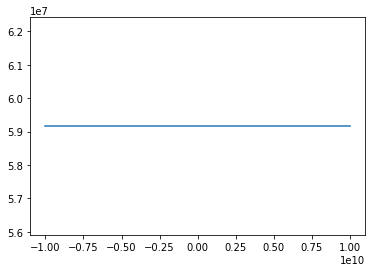

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f5662401ae8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-0

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.643270876034423
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.662971803858175
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.682672731681928
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.70237365950568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.722074587329432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.741775515

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56621434a8>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
Running optimization for state: 6.584168092563167
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.603869020386919
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.623569948210672
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.643270876034423
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.662971803858175
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.682672731681928
1e-06
1e-06
1e-06
1e-06
1e-0

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f5662355188>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.328056030854389
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.347756958678142
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.367457886501893
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.3871588143256455
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.406859742149398
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f563bec1458>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.485663453444406
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5053643812681585
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.525065309091911
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.544766236915663
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.564467164739415
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

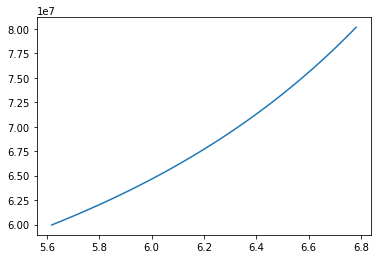

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56622a3688>
Running optimization for state: 5.618822629199312
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.638523557023064
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.658224484846817
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.677925412670568
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.69762634049432
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.717327268318073
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e

Running optimization for state: 6.525065309091911
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.544766236915663
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.564467164739415
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.584168092563167
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.603869020386919
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.623569948210672
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-0

In [229]:
op3 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.5, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList3 = op3.run_optimization()

op4 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.8, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList4 = op4.run_optimization()

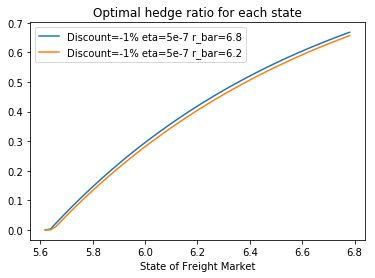

In [230]:
plt.plot(oRTList3[1].oLegList[4].Hedge_Ratio.x,
         oRTList3[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.8')
plt.plot(oRTList4[1].oLegList[4].Hedge_Ratio.x,
         oRTList4[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.2')


plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='upper left')
plt.show()

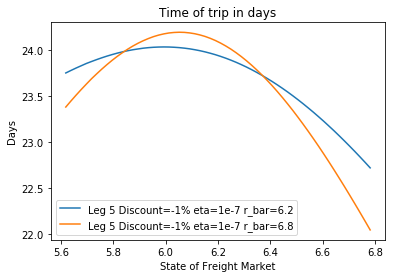

In [231]:
plt.plot(oRTList3[1].oLegList[4].TimeAtSea_Days.x,
         oRTList3[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.2')
plt.plot(oRTList4[1].oLegList[4].TimeAtSea_Days.x,
         oRTList4[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.8')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='lower left')
plt.title('Time of trip in days')
plt.show()

## Checking if the function is convex

In [232]:
ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=1.8, r_sigma=0.3)
ffa = FFA.FFA(fut_curve_slope = -0.5)

params = [ou_process.r_bar ,oShip, oPortList, oJourney, ou_process, ffa, 0.00002]

In [233]:
leg = oRTList0[1].oLegList[0]
t_range = np.linspace(leg.TimeAtSeaMin_Days,leg.TimeAtSeaMax_Days,num=100)
h_range = np.linspace(0,1,num=100)
z = np.zeros((100,100))
it = 0
ih = 0
max_z = 0
for t in t_range:
    ih = 0
    for h in h_range:
        z[it,ih],q = leg.CalcGoodwill([h,t],params)
        if z[it,ih]>max_z:
            h_max = h
            t_max = t
            max_z = z[it,ih] 
        ih = ih + 1
    it = it + 1
    

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05


In [234]:
print([h_max,t_max,max_z])

[0.686868686868687, 23.200361457714397, 69986125.23704955]


In [235]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
x, y = t_range, h_range
fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])
fig.update_layout(title='Goodwill as a function of time and hedge ratio', autosize=False,
                  width=1000, height=1000,
                  scene = dict(
                    xaxis_title='Time of the leg in days',
                    yaxis_title='Hedge ratio from 0 to 1',
                    zaxis_title='Value of the ship'),
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [236]:
leg.FindBestGoodwill(ou_process, ffa, 0, oJourney, oShip, oRTList0, oPortList)

RoundtripNr:1
LegNr:1


FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f56901d3d18>
Running optimization for state: 5.618822629199312
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.638523557023064
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.658224484846817
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.677925412670568
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.69762634049432
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.717327268318073
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.737028196141825
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.756729123965577
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.776430051789329
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.796130979613081
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


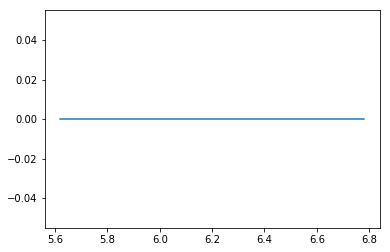

In [237]:
plt.plot(leg.Hedge_Ratio.x,leg.Hedge_Ratio.y)